# Regression and Other Stories: Pearson and Lee Heights
The heredity of height. Published in 1903 by Karl Pearson and Alice Lee. See Chapter 6 in Regression and Other Stories.

*Note* This is missing some of the plots in the full rmd

In [1]:
import arviz as az
from bambi import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Load data

In [2]:
heights = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/PearsonLee/data/Heights.txt",
                      delimiter=" ")
heights.iloc[:5]

,daughter_height,mother_height
0,52.5,59.5
1,52.5,59.5
2,53.5,59.5
3,53.5,59.5
4,55.5,59.5


### Linear regression

In [3]:
model = Model(heights)
results = model.fit('daughter_height ~ mother_height', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [daughter_height_sd, mother_height, Intercept]
INFO:pymc3:NUTS: [daughter_height_sd, mother_height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
The acceptance probability does not match the target. It is 0.890386241199019, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [5]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],29.86,0.56
mother_height[0],0.54,0.01
daughter_height_sd,2.26,0.02


In [6]:
a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["mother_height[0]", "Median"]

### Plot mothers’ and daughters’ heights

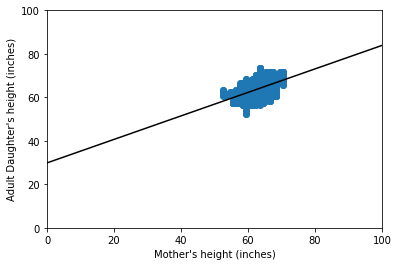

In [7]:
fig, ax = plt.subplots()
ax.scatter(heights["mother_height"], heights["daughter_height"])
ax.set_xlabel("Mother's height (inches)")
ax.set_ylabel("Adult Daughter's height (inches)")

x = np.array([0, 100])


ax.plot(x, a_hat+b_hat*x, c="black")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

### Plot mothers’ and daughters’ heights

In [8]:
n = heights.shape[0]
mother_height_jitt = heights["mother_height"] + stats.uniform(-.5,.5).rvs(n)
daughter_height_jitt = heights["daughter_height"] + stats.uniform(-.5,.5).rvs(n)


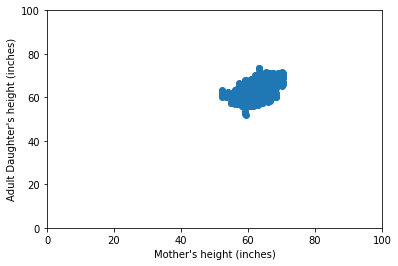

In [9]:
fig, ax = plt.subplots()
ax.scatter(mother_height_jitt, daughter_height_jitt)
ax.set_xlabel("Mother's height (inches)")
ax.set_ylabel("Adult Daughter's height (inches)")


ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

### Plot mothers’ and daughters’ heights and fitted regression line

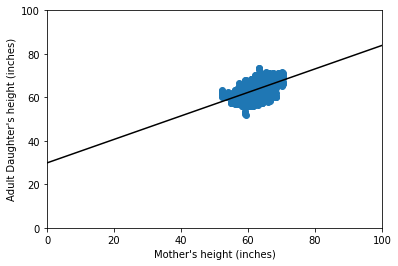

In [10]:
fig, ax = plt.subplots()
ax.scatter(mother_height_jitt, daughter_height_jitt)
ax.set_xlabel("Mother's height (inches)")
ax.set_ylabel("Adult Daughter's height (inches)")

x = np.array([0, 100])


ax.plot(x, a_hat+b_hat*x, c="black")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100);